# Customer Segmentation (phân khúc khách hàng)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\AppData\Local\Temp\ipykernel_17900\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv(r'D:\AI\Machine_Learning\unsupervised_learning\Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={'Genre':'Gender'},inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df=df.drop(['CustomerID'],axis=1)

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Analyst and Visualization

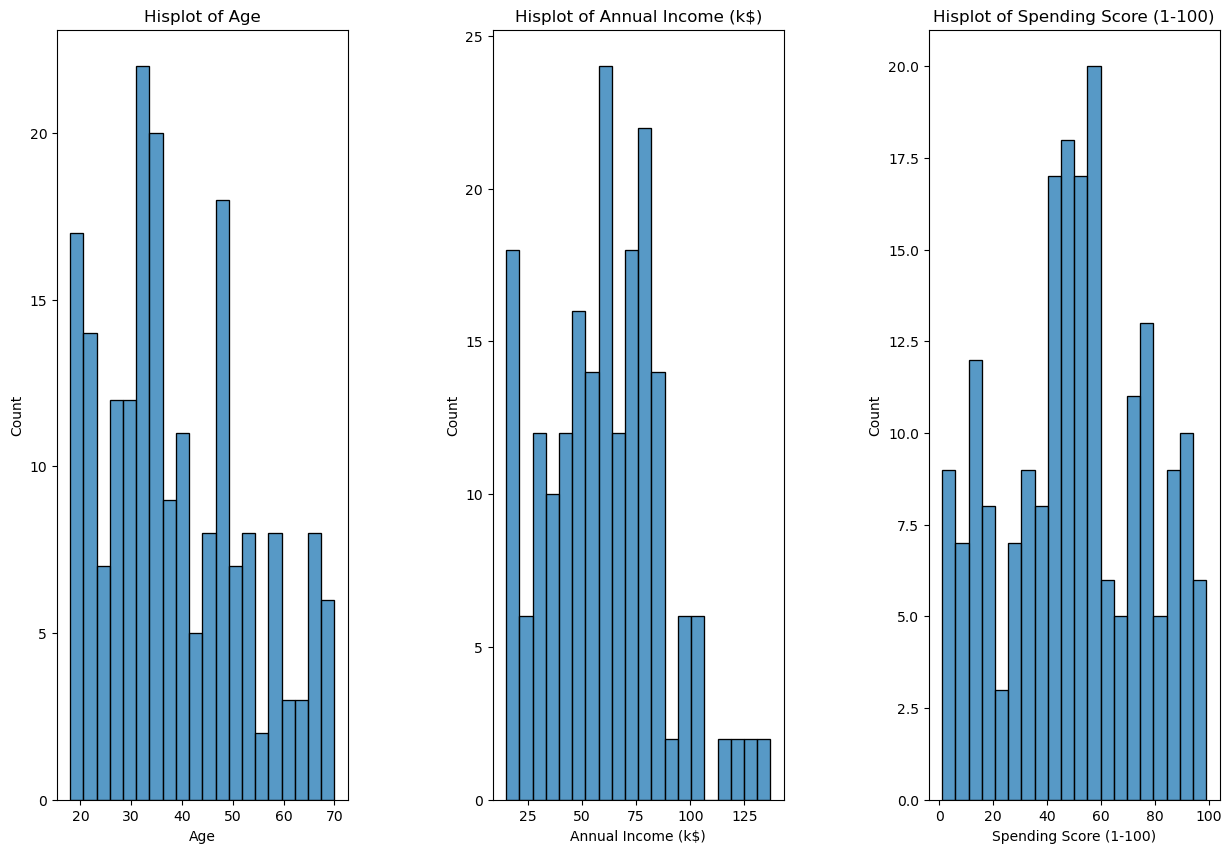

In [10]:
def feature(df):
    fig, ax = plt.subplots(1, 3, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.5,wspace=0.5)
    columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    for i, axes in enumerate(ax):
        sns.histplot(df[columns[i]], bins=20, ax=axes)
        axes.set_title('Hisplot of {}'.format(columns[i]))
    plt.show()

feature(df)

Text(0.5, 1.0, 'Gender')

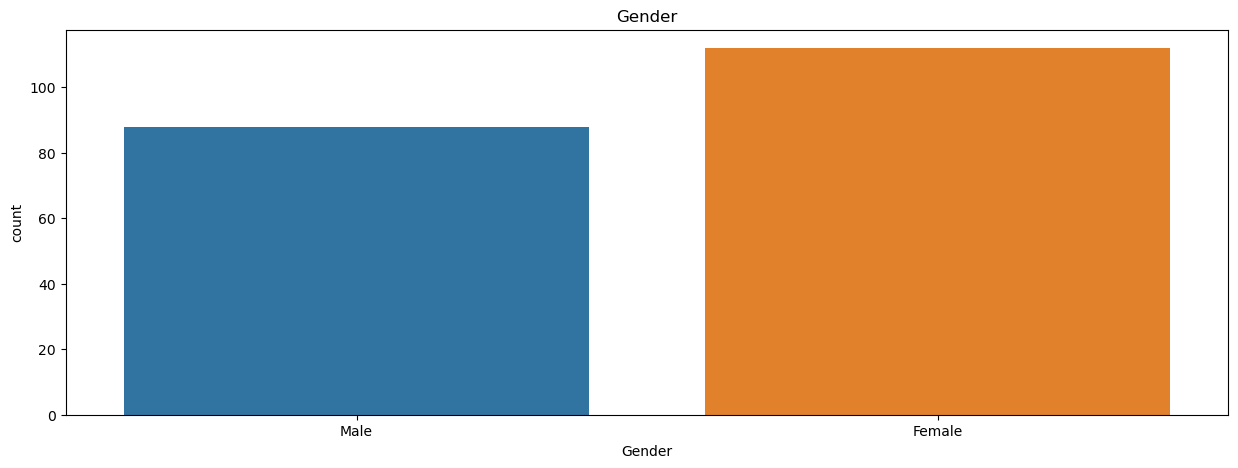

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Gender',hue='Gender')
plt.title('Gender')

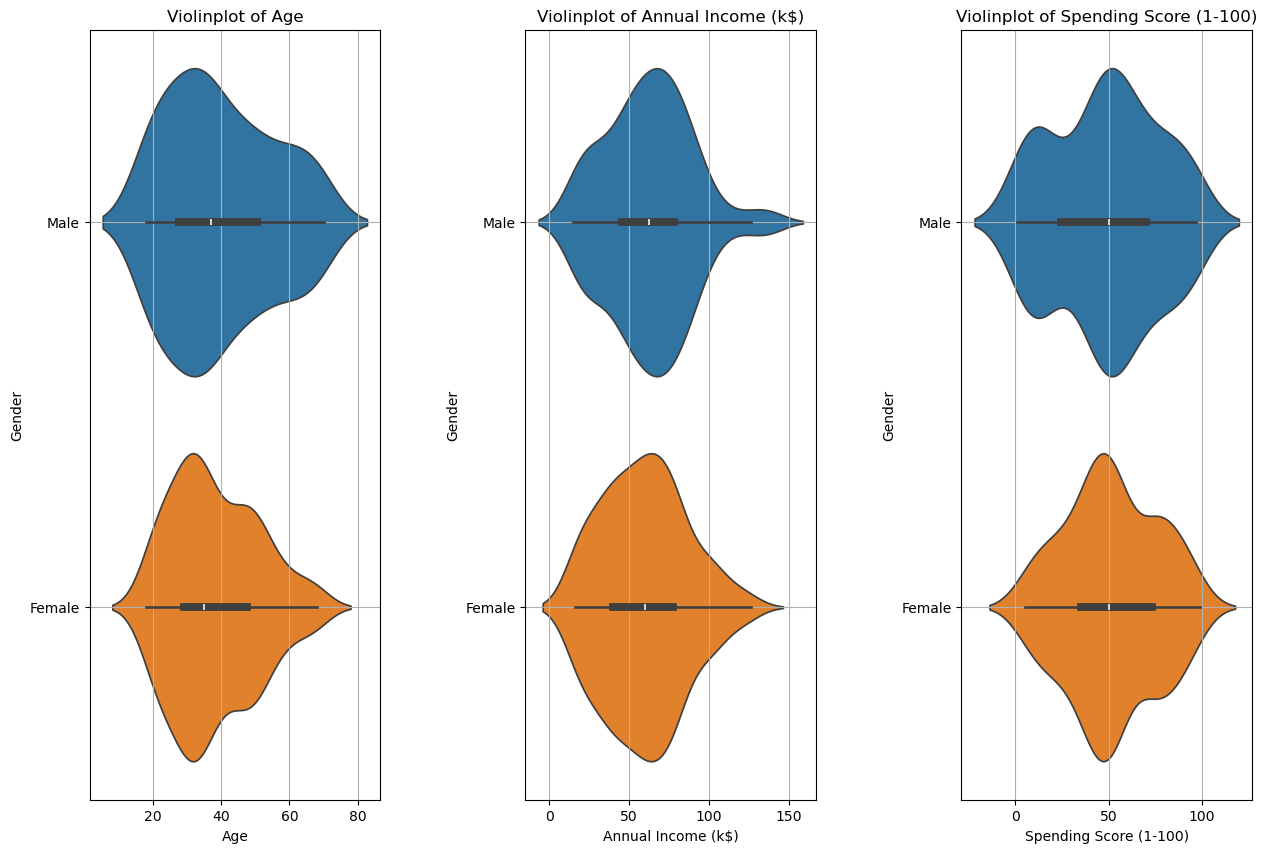

In [12]:
def feature(df):
    fig, ax = plt.subplots(1, 3, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.5,wspace=0.5)
    columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    for i, axes in enumerate(ax):
        sns.violinplot(x=df[columns[i]],y=df['Gender'],hue=df['Gender'], ax=axes)
        axes.grid('whitegrid')
        axes.set_title('Violinplot of {}'.format(columns[i]))
    plt.show()

feature(df)

C:\Users\HP\AppData\Local\Temp\ipykernel_17900\2900066322.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex,y=agey,palette='mako')


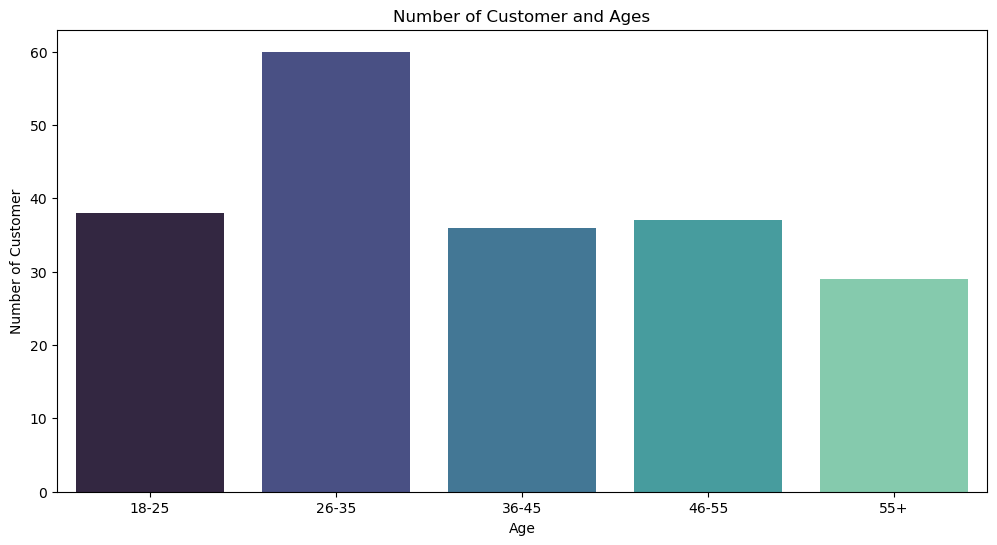

In [13]:
age_18_25=df[(df['Age']>=18)&(df['Age']<=25)]
age_26_35=df[(df['Age']>=26)&(df['Age']<=35)]
age_36_45=df[(df['Age']>=36)&(df['Age']<=45)]
age_46_55=df[(df['Age']>=46)&(df['Age']<=55)]
age_55above=df[df['Age']>=56]

agex=['18-25','26-35','36-45','46-55','55+']
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

def age(agex,agey):
    fig,ax=plt.subplots(1,1,figsize=(12,6))
    sns.barplot(x=agex,y=agey,palette='mako')
    ax.set_title('Number of Customer and Ages')
    ax.set_xlabel('Age')
    ax.set_ylabel('Number of Customer')
age(agex,agey)

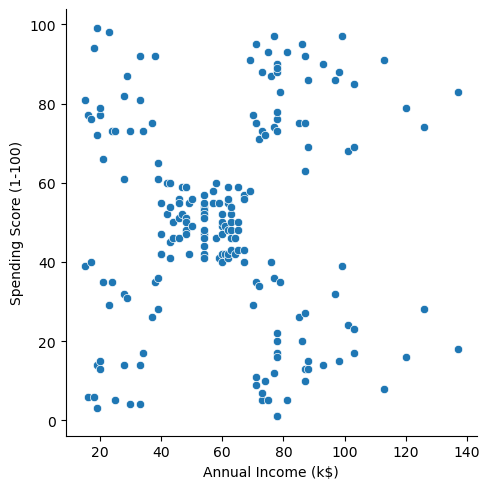

In [14]:
sns.relplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])

C:\Users\HP\AppData\Local\Temp\ipykernel_17900\2695349677.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx,y=ssy,palette='rocket')


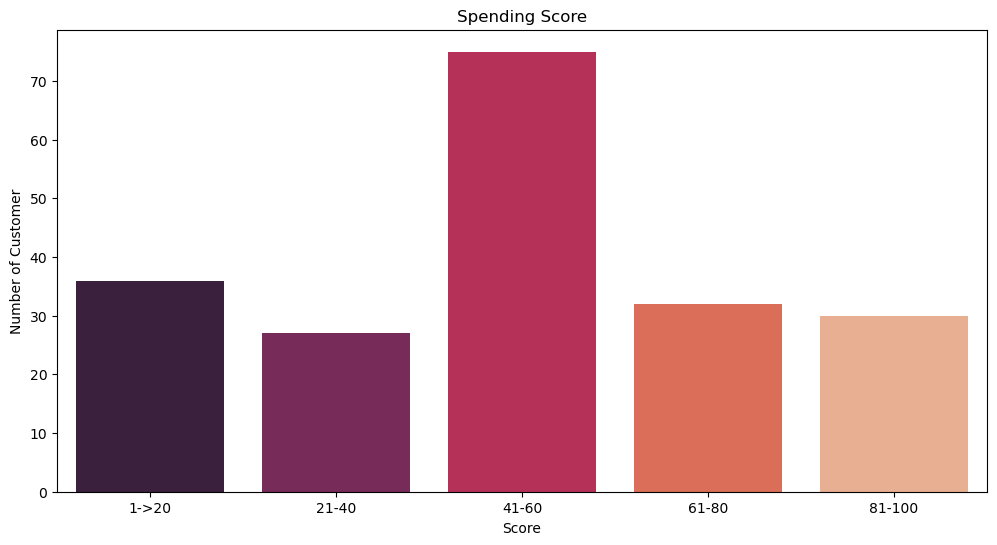

In [15]:
ss_1_20=df[(df['Spending Score (1-100)']>=1)&(df['Spending Score (1-100)']<=20)]
ss_21_40=df[(df['Spending Score (1-100)']>=21)&(df['Spending Score (1-100)']<=40)]
ss_41_60=df[(df['Spending Score (1-100)']>=41)&(df['Spending Score (1-100)']<=60)]
ss_61_80=df[(df['Spending Score (1-100)']>=61)&(df['Spending Score (1-100)']<=80)]
ss_81_100=df[(df['Spending Score (1-100)']>=81)&(df['Spending Score (1-100)']<=100)]

ssx=['1->20','21-40','41-60','61-80','81-100']
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

def spending(ssx,ssy):
    fig,ax=plt.subplots(1,1,figsize=(12,6))
    sns.barplot(x=ssx,y=ssy,palette='rocket')
    ax.set_title('Spending Score')
    ax.set_xlabel('Score')
    ax.set_ylabel('Number of Customer')
spending(ssx,ssy)

C:\Users\HP\AppData\Local\Temp\ipykernel_17900\3831246607.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix,y=aiy,palette='Paired')


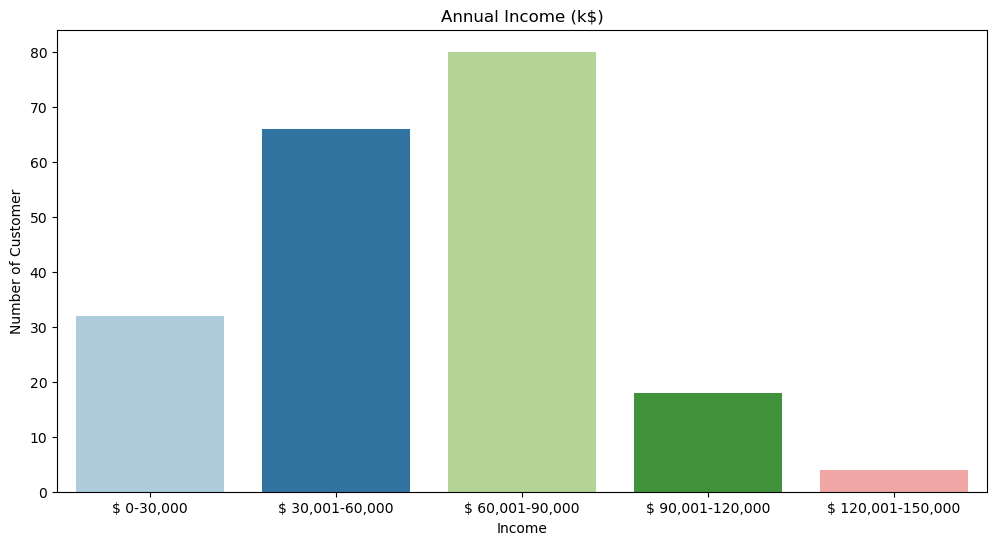

In [16]:
ai0_30=df[(df['Annual Income (k$)']>=0) & (df['Annual Income (k$)']<=30)]
ai31_60=df[(df['Annual Income (k$)']>=31) & (df['Annual Income (k$)']<=60)]
ai61_90=df[(df['Annual Income (k$)']>=61) & (df['Annual Income (k$)']<=90)]
ai91_120=df[(df['Annual Income (k$)']>=91) & (df['Annual Income (k$)']<=120)]
ai121_150=df[(df['Annual Income (k$)']>=121) & (df['Annual Income (k$)']<=150)]

aix=['$ 0-30,000','$ 30,001-60,000','$ 60,001-90,000','$ 90,001-120,000','$ 120,001-150,000']
aiy=[len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]

def annul(aix,aiy):
    fig,axe=plt.subplots(1,1,figsize=(12,6))
    sns.barplot(x=aix,y=aiy,palette='Paired')
    axe.set(title='Annual Income (k$)',xlabel='Income',ylabel='Number of Customer')
annul(aix,aiy)

# Optimal cluster

In [17]:
#Relationship between age and spending score and clustering
X1=df.loc[:,['Age','Spending Score (1-100)']].values #using values to convert to array
X1

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [18]:
from sklearn.cluster import KMeans

# Elbow method

c:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

Text(0, 0.5, 'WSS')

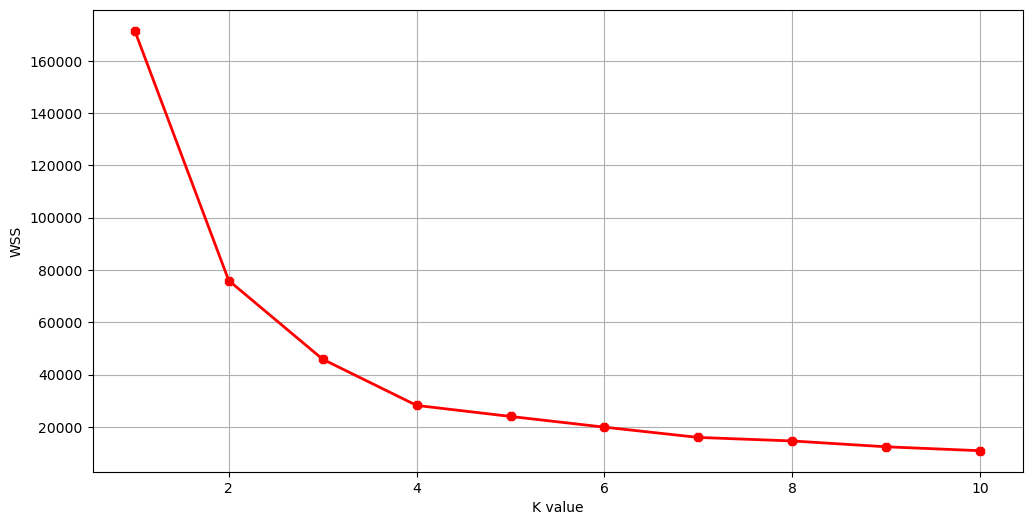

In [19]:
WCSS=[] #sum of squares
def cluster():
    for k in range(1,11):
        kmeans=KMeans(n_clusters=k,init='k-means++')
        kmeans.fit(X1)
        WCSS.append(kmeans.inertia_)
    return WCSS

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),cluster(),linewidth=2,color='red',marker='8')
plt.xlabel('K value')
plt.ylabel('WSS')


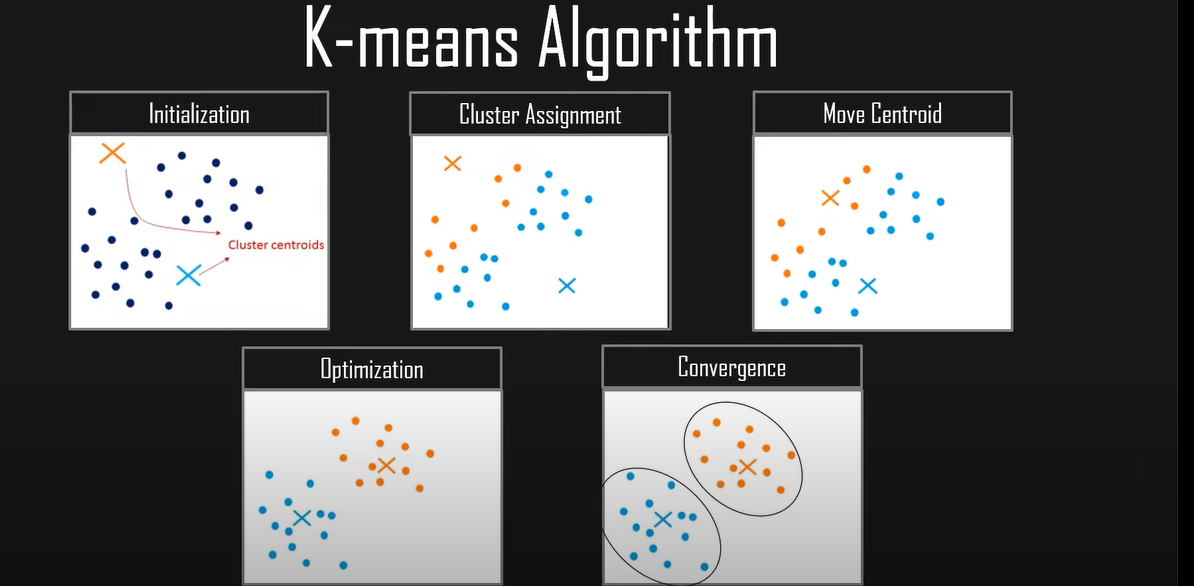

# Create Cluster

In [20]:
kmeans=KMeans(n_clusters=4)

label=kmeans.fit_predict(X1)
print(label)

c:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 1 1 3 2 1 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3
 2 3 2 0 2 0 1 3 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 2 1 2 0 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 0 2
 3 2 3 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [21]:
#optimal cluster by centroid
print(kmeans.cluster_centers_) #first column is X['Age'], the second is X['Spending Score']

[[55.70833333 48.22916667]
 [27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]]


# Plot clustering

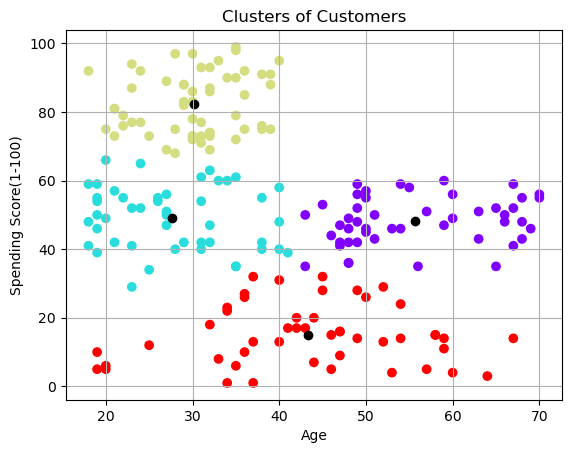

In [22]:
def cluster_label(X1):
    fig,ax=plt.subplots(1,1)
    plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
    ax.set(title='Clusters of Customers',xlabel='Age',ylabel='Spending Score(1-100)')
    ax.grid()
cluster_label(X1)

c:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

Text(0, 0.5, 'WSS')

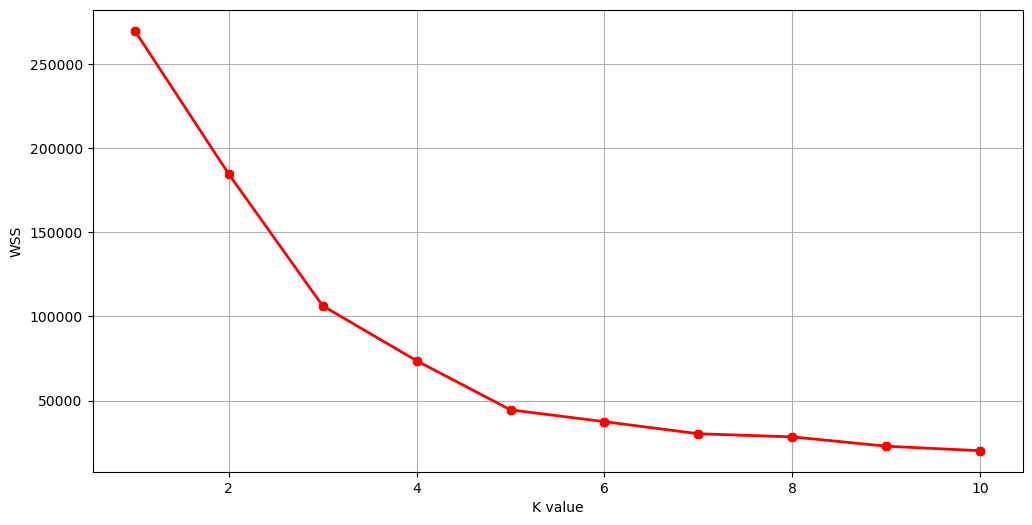

In [23]:
#Relationship between annual income and spending score and clustering
X2=df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values #using values to convert to array

WCSS1=[] #sum of squares
def cluster1():
    for k in range(1,11):
        kmeans=KMeans(n_clusters=k,init='k-means++')
        kmeans.fit(X2)
        WCSS1.append(kmeans.inertia_)
    return WCSS1

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),cluster1(),linewidth=2,color='red',marker='8')
plt.xlabel('K value')
plt.ylabel('WSS')


In [24]:
kmeans=KMeans(n_clusters=5)

label1=kmeans.fit_predict(X2)
print(label1)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


c:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
print(kmeans.cluster_centers_)

[[55.0875     49.7125    ]
 [86.53846154 82.12820513]
 [87.75       17.58333333]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


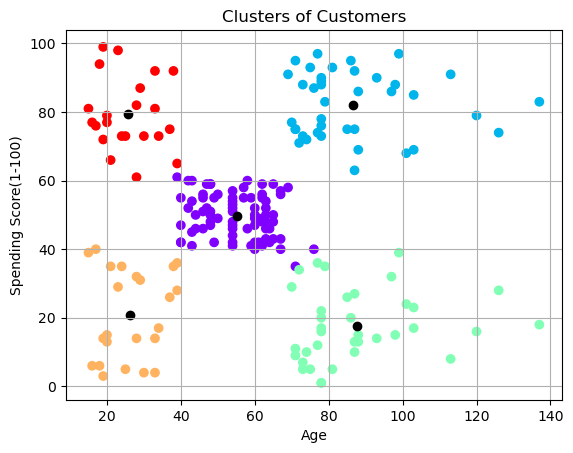

In [26]:
def cluster_label1(X2):
    fig,ax=plt.subplots(1,1)
    plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_,cmap='rainbow')
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
    ax.set(title='Clusters of Customers',xlabel='Annual Income(k$)',ylabel='Spending Score(1-100)')
    ax.grid()
cluster_label(X2)

c:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

Text(0, 0.5, 'WSS')

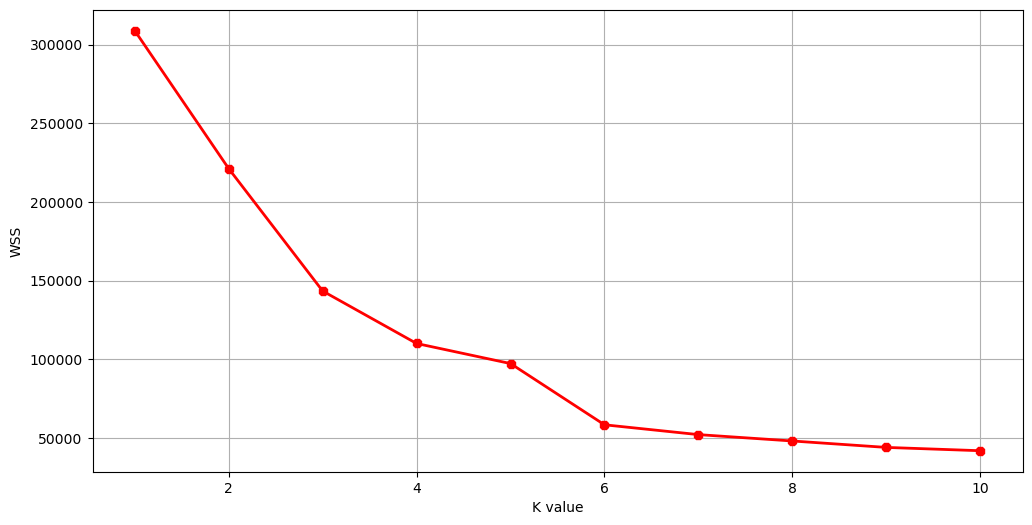

In [27]:
X3=df.iloc[:,1:] #got 3 columns that we need which is age,annual income and spending score

wcss=[]
def cluster2():
    for k in range(1,11):
        kmeans=KMeans(n_clusters=k,init='k-means++')
        kmeans.fit(X3)
        wcss.append(kmeans.inertia_)
    return wcss

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),cluster2(),linewidth=2,color='red',marker='8')
plt.xlabel('K value')
plt.ylabel('WSS')


In [28]:
kmeans=KMeans(n_clusters=5,random_state=42)

label2=kmeans.fit_predict(X3)

print(label2)

[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0
 4 0 0 0 4 0 0 0 0 4 0 4 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


c:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
#centroid
print(kmeans.cluster_centers_)

[[ 46.21348315  47.71910112  41.79775281]
 [ 32.45454545 108.18181818  82.72727273]
 [ 24.68965517  29.5862069   73.65517241]
 [ 40.39473684  87.          18.63157895]
 [ 31.78787879  76.09090909  77.75757576]]


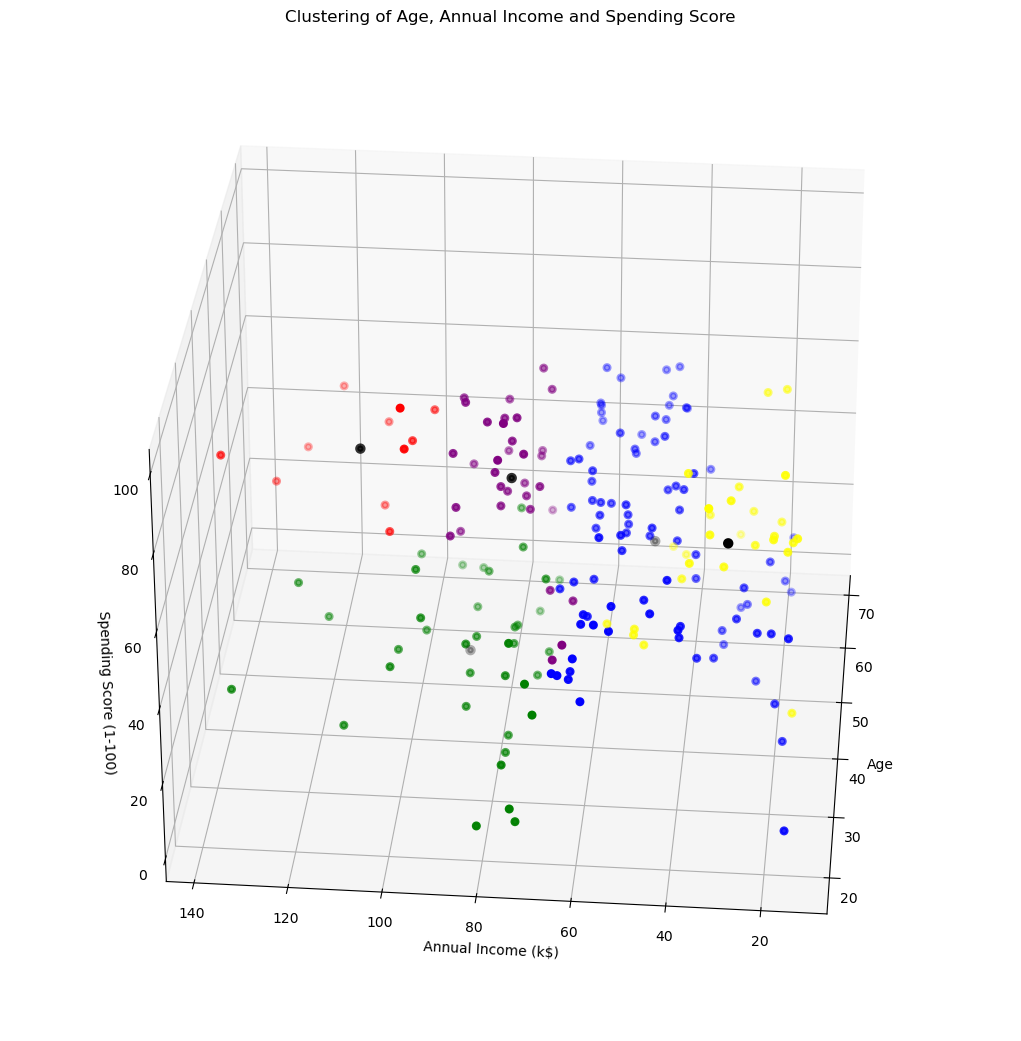

In [30]:
df['label']=label2
from mpl_toolkits.mplot3d import Axes3D

def ClusterLabel(df):
    fig=plt.figure(figsize=(15,13))
    ax=fig.add_subplot(1,1,1,projection='3d')
    ax.scatter(df[df['label']==0]['Age'],df[df['label']==0]['Annual Income (k$)'],df[df['label']==0]['Spending Score (1-100)'],c='blue',linewidths=2)
    ax.scatter(df[df['label']==1]['Age'],df[df['label']==1]['Annual Income (k$)'],df[df['label']==1]['Spending Score (1-100)'],c='red',linewidths=2)
    ax.scatter(df[df['label']==2]['Age'],df[df['label']==2]['Annual Income (k$)'],df[df['label']==2]['Spending Score (1-100)'],c='yellow',linewidths=2)
    ax.scatter(df[df['label']==3]['Age'],df[df['label']==3]['Annual Income (k$)'],df[df['label']==3]['Spending Score (1-100)'],c='green',linewidths=2)
    ax.scatter(df[df['label']==4]['Age'],df[df['label']==4]['Annual Income (k$)'],df[df['label']==4]['Spending Score (1-100)'],c='purple',linewidths=2)
    ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],color='black',linewidths=3)
    ax.view_init(30,185)
    ax.set(title='Clustering of Age, Annual Income and Spending Score',xlabel='Age',ylabel='Annual Income (k$)',zlabel='Spending Score (1-100)')
ClusterLabel(df)

In [31]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,0
3,Female,23,16,77,2
4,Female,31,17,40,0


c:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 1 2 1 0 3 3 2 1 0 0 4 2 1 0 0 4 0 0 4 0 3 3 0 1 1 0 1 1 1 3 2 3 4 4 1
 0 0 3 1 4]


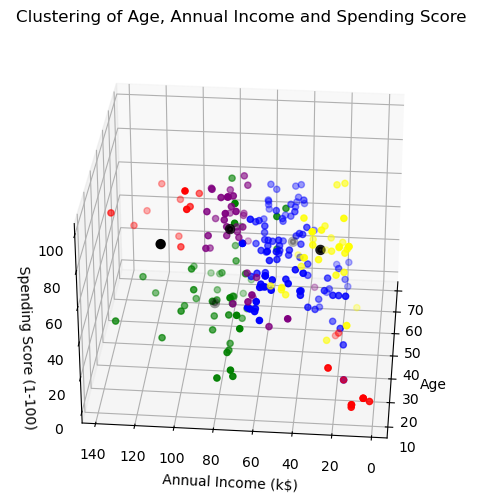

In [32]:
data = np.array([
    [19,15,39],
    [21,15,81],
    [20,16,6],

    [30, 18, 55],
    [12, 11, 3],
    [55, 65, 34],

    [50, 75, 54],
    [35, 75, 74],
    [30, 18, 55],

    [12, 11, 3],
    [52, 60, 32],
    [56, 71, 51],

    [33, 65, 34],
    [30, 11, 35],
    [11, 11, 3],

    [51, 62, 24],
    [50, 74, 44],
    [30, 75, 34],

    [51, 62, 24],
    [50, 74, 44],
    [30, 75, 34],

    [51, 62, 24],
    [40, 54, 54],
    [36, 75, 84],

    [53, 42, 24],
    [19, 24, 14],
    [10, 5, 10],

    [53, 42, 24],
    [19, 24, 14],
    [10, 5, 10],

    [13, 2, 4],
    [39, 54, 74],
    [19, 25, 30],

    [48, 79, 84],
    [39, 34, 34],
    [20, 45, 40],

    [33, 22, 14],
    [60, 54, 34],
    [61, 25, 20],

    [43, 50, 74],
    [29, 20, 21],
    [23, 55, 31],


])

kmeans1 = KMeans(n_clusters=5,random_state=42,)
predicted_labels = kmeans1.fit_predict(data)
print(predicted_labels)
def predict_label(data,df, predicted_labels):
    fig = plt.figure(figsize=(12, 6))
    ax=fig.add_subplot(1,1,1,projection='3d')
    filter_label0=data[predicted_labels==0]
    filter_label1=data[predicted_labels==1]
    filter_label2=data[predicted_labels==2]
    filter_label3=data[predicted_labels==3]
    filter_label4=data[predicted_labels==4]
    
    ax.scatter(df[df['label']==0]['Age'],df[df['label']==0]['Annual Income (k$)'],df[df['label']==0]['Spending Score (1-100)'],c='blue')
    ax.scatter(df[df['label']==1]['Age'],df[df['label']==1]['Annual Income (k$)'],df[df['label']==1]['Spending Score (1-100)'],c='red')
    ax.scatter(df[df['label']==2]['Age'],df[df['label']==2]['Annual Income (k$)'],df[df['label']==2]['Spending Score (1-100)'],c='yellow')
    ax.scatter(df[df['label']==3]['Age'],df[df['label']==3]['Annual Income (k$)'],df[df['label']==3]['Spending Score (1-100)'],c='green')
    ax.scatter(df[df['label']==4]['Age'],df[df['label']==4]['Annual Income (k$)'],df[df['label']==4]['Spending Score (1-100)'],c='purple')

    ax.scatter(filter_label0[:,0],filter_label0[:,1],filter_label0[:,2],color='blue')
    ax.scatter(filter_label1[:,0],filter_label1[:,1],filter_label1[:,2],color='red')
    ax.scatter(filter_label2[:,0],filter_label2[:,1],filter_label2[:,2],color='yellow')
    ax.scatter(filter_label3[:,0],filter_label3[:,1],filter_label3[:,2],color='green')
    ax.scatter(filter_label4[:,0],filter_label4[:,1],filter_label4[:,2],color='purple')
    ax.scatter(kmeans1.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],color='black',linewidths=3)
    ax.view_init(30,185)
    ax.set(title='Clustering of Age, Annual Income and Spending Score',xlabel='Age',ylabel='Annual Income (k$)',zlabel='Spending Score (1-100)')

predict_label(data,df, predicted_labels)


In [33]:
from sklearn.metrics import pairwise_distances

# Processing outlier


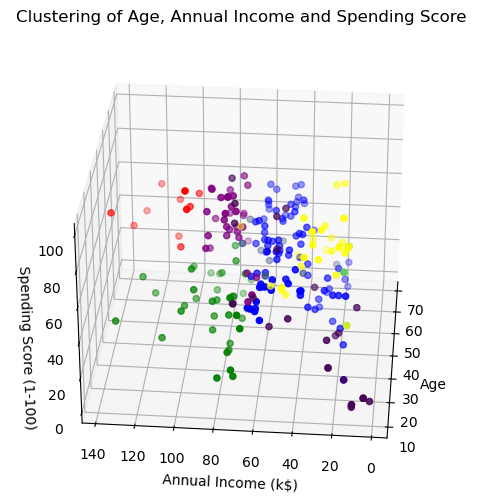

In [47]:
distance=pairwise_distances(data,kmeans.cluster_centers_) #compute distance between both of them
threshold=40.0
centroids=[]
labels=[]
distan=[]
for i,point in enumerate(data):
    cluster=kmeans1.labels_[i] #cluster along with label
    centroid=kmeans1.cluster_centers_[cluster]
    distances=distance[i,cluster]
    label=cluster if np.min(distances)<threshold else -1 #-1 is outlier
    labels.append(label)
    centroids.append(centroid)
    distan.append(distances)
    # print(f"Point {point}: Assigned Label - {label}")
    
#all labels
# print("Labels:", labels)

def plot(data,df,labels,centroid):
    fig=plt.figure(figsize=(12,6))
    ax=fig.add_subplot(1,1,1,projection='3d')
    ax.scatter(df[df['label']==0]['Age'],df[df['label']==0]['Annual Income (k$)'],df[df['label']==0]['Spending Score (1-100)'],c='blue')
    ax.scatter(df[df['label']==1]['Age'],df[df['label']==1]['Annual Income (k$)'],df[df['label']==1]['Spending Score (1-100)'],c='red')
    ax.scatter(df[df['label']==2]['Age'],df[df['label']==2]['Annual Income (k$)'],df[df['label']==2]['Spending Score (1-100)'],c='yellow')
    ax.scatter(df[df['label']==3]['Age'],df[df['label']==3]['Annual Income (k$)'],df[df['label']==3]['Spending Score (1-100)'],c='green')
    ax.scatter(df[df['label']==4]['Age'],df[df['label']==4]['Annual Income (k$)'],df[df['label']==4]['Spending Score (1-100)'],c='purple')

    ax.scatter(data[:,0],data[:,1],data[:,2],c=labels,cmap='viridis')
    # ax.scatter(centroid[:,0],centroid[:,1],centroid[:,2],color='black',linewidths=2)

    ax.view_init(30,185)
    ax.set(title='Clustering of Age, Annual Income and Spending Score',xlabel='Age',ylabel='Annual Income (k$)',zlabel='Spending Score (1-100)')
plot(data,df,labels,np.array(centroids))